In [20]:
# 사이킷런을 활용한 머신러닝 공부용 라이브러리
# pip install mglearn

K-NN (k nearest neighbors)

최근접 이웃 알고리즘은 데이터포인트 주변에 가장 가까운 데이터포인트 k개를 기준으로결과를 결정짓는 알고리즘입니다. 분류,회귀 모두 사용이 가능합니다.

In [19]:
import mglearn
import matplotlib.pyplot as plt

plt.rc('font',family='Malgun Gothic')

C:\Users\DIAMOND\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


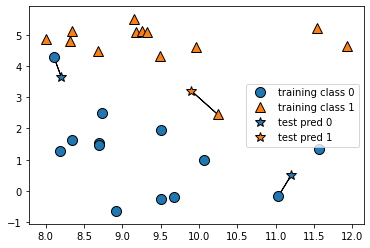

In [4]:
# 이웃의 개수를 1개로 설정
mglearn.plots.plot_knn_classification(n_neighbors=1)

C:\Users\DIAMOND\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


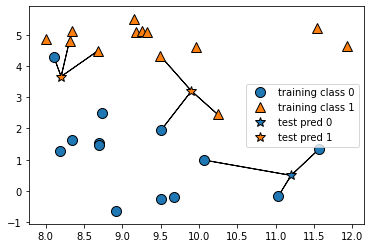

In [5]:
# 이웃의 개수를 3개로 설정
mglearn.plots.plot_knn_classification(n_neighbors=3)

C:\Users\DIAMOND\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


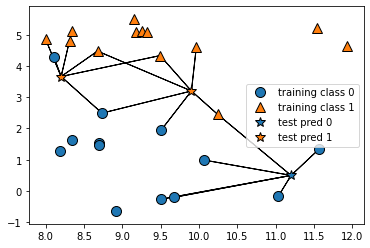

In [6]:
# 이웃의 개수를 6개로 설정
mglearn.plots.plot_knn_classification(n_neighbors=6)

k-NN 알고리즘에서 이웃의 개수를 조절하면 복잡도가 조절된다.
- 이웃의 개수가 늘어나면 복잡도는 내려간다
- k 가 작을 경우 데이터의 지역적 특성을 지나치게 반영하게 됩니다(overfitting). 반대로 매우 클 경우 모델이 과하게 정규화되는 경향이 있습니다(underfitting).

In [9]:
# k-nn 사용하기
from sklearn.model_selection import train_test_split
# 1. 데이터 불러오기
x,y = mglearn.datasets.make_forge()

x_train, x_test, y_train, y_test = train_test_split(
x, y, random_state=0)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)

In [16]:
clf.fit(x_train,y_train)

print('테스트 세트 예측 : {}'.format(clf.predict(x_test)))
print('정답 : {}'.format(y_test))

print('테스트 세트 점수 : {:.2f}'.format(clf.score(x_test,y_test)))

테스트 세트 예측 : [1 0 1 0 1 0 0]
정답 : [1 0 1 0 1 1 0]
테스트 세트 점수 : 0.86


In [ ]:
fig, axes = plt.subplots(1,5,figsize=(20,3))

for n, ax in zip([1,3,6,9,26], axes):
    clf = KNeighborsClassifier(n_neighbors=n).fit(x,y)
    mglearn.plots.plot_2d_separator(clf,x,fill=True,eps=0.5,ax=ax,alpha=0.4)
    mglearn.discrete_scatter

In [23]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np

In [24]:
cancer = load_breast_cancer()

In [26]:
x_train, x_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state=66,stratify=cancer.target)

In [27]:
# 정확도를 기록하기 위한 리스트 생성
train_accuracy = []
test_accuracy = []

In [28]:
#이웃의 개수를 설정 (1~10개)
n = range(1,11)

In [29]:
for i in n:
    #모델생성하기
    clf= KNeighborsClassifier(n_neighbors=i)
    clf.fit(x_train,y_train)
    
    train_accuracy.append(clf.score(x_train,y_train))
    test_accuracy.append(clf.score(x_test,y_test))

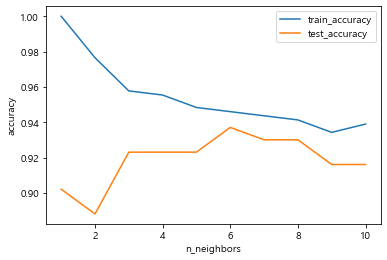

In [33]:
# 시각화

plt.plot(n,train_accuracy,label='train_accuracy')
plt.plot(n,test_accuracy,label='test_accuracy')
plt.ylabel('accuracy')
plt.xlabel('n_neighbors')
plt.legend()
plt.show()

k-nn Regression

C:\Users\DIAMOND\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\DIAMOND\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


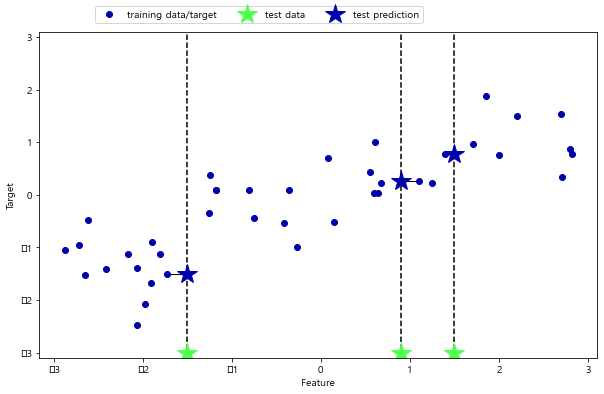

In [35]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

C:\Users\DIAMOND\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\DIAMOND\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


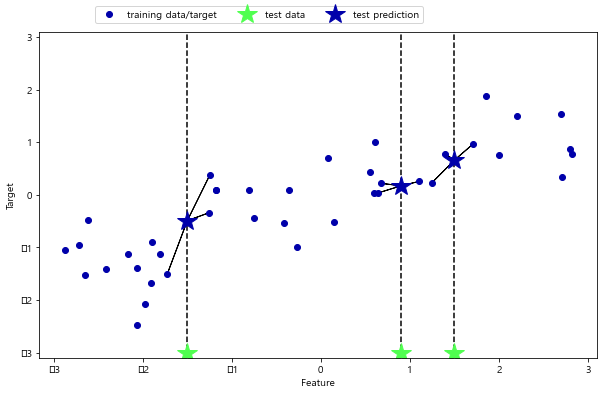

In [37]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [36]:
from sklearn.neighbors import KNeighborsRegressor

In [38]:
x,y = mglearn.datasets.make_wave(n_samples=40)

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)

reg.fit(x_train,y_train)

print('테스트 세트 예측 : \n{}'.format(reg.predict(x_test)))
print('테스트 세트 점수 : {:.2f}'.format(reg.score(x_test,y_test)))

테스트 세트 예측 : 
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
테스트 세트 점수 : 0.83


$R^2$ 은 결정계수 라고 합니다. 회귀에서의 스코어링에 사용됩니다.

C:\Users\DIAMOND\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\DIAMOND\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


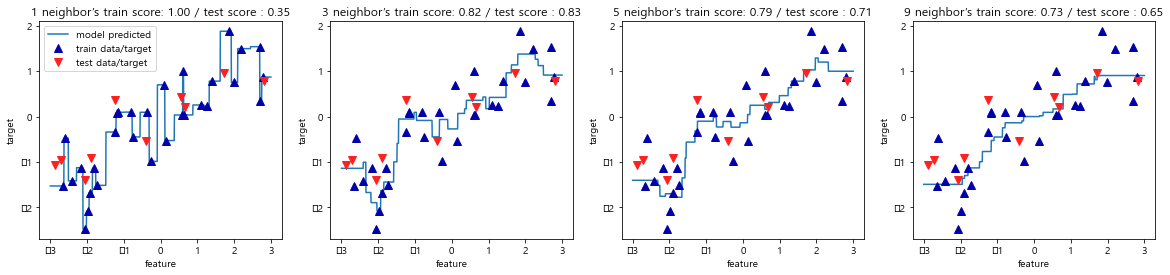

In [48]:
fig, axes = plt.subplots(1,4, figsize=(20,4))
#-3과 3 사이에 1000개의 데이터 만들기 -> 테스트 용도로 사용함
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1,3,5,9], axes):
    # 이웃의 개수를 1,3,9로 하여 예측하는 모델을 만듭니다
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(x_train, y_train)
    ax.plot(line, reg.predict(line)) # 테스트 용도로 만든 데이터를 예측하고 예측 결과를 선으로 표현합니다.
    ax.plot(x_train, y_train, '^', c=mglearn.cm2(0), markersize=8) # 훈련 데이터를 그래프에 표시합니다.
    ax.plot(x_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)   # 테스트 데이터를 그래프에 표시합니다.
    # 훈련 데이터의 점수와 테스트 데이터의 점수를 제목에 표현합니다.
    ax.set_title('{} neighbor’s train score: {:.2f} / test score : {:.2f}'.format(n_neighbors, reg.score(x_train, y_train), reg.score(x_test, y_test)))
    ax.set_xlabel('feature')
    ax.set_ylabel('target')
axes[0].legend(['model predicted', 'train data/target', 'test data/target'], loc='best')